In [1]:
import unittest
import timeit
import os

import cv2
import numpy as np
import scipy.io as sio


import _align
import _calCRF
import _merge
import _tonemap

In [2]:
def readImagesAndTimes():
  
    times = np.array([ 1/30.0, 0.25, 2.5, 15.0 ], dtype=np.float32)
  
    filenames = ["imgs/img_0.033.jpg", "imgs/img_0.25.jpg", "imgs/img_2.5.jpg", "imgs/img_15.jpg"]
  
    images = []
    for filename in filenames:
        im = cv2.imread(filename)
        images.append(im)
  
    return images, times

In [3]:
images, times = readImagesAndTimes()

In [5]:
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images) 

In [8]:
calibrateDebevec = cv2.createCalibrateDebevec()
resDebevec = calibrateDebevec.process(images, times)

In [30]:
resDebevec_our = _calCRF.process(images, times)
resDebevec_our_np = np.array(resDebevec_our, dtype=np.float32)
resDebevec_our_np.resize((256, 1, 3)) 

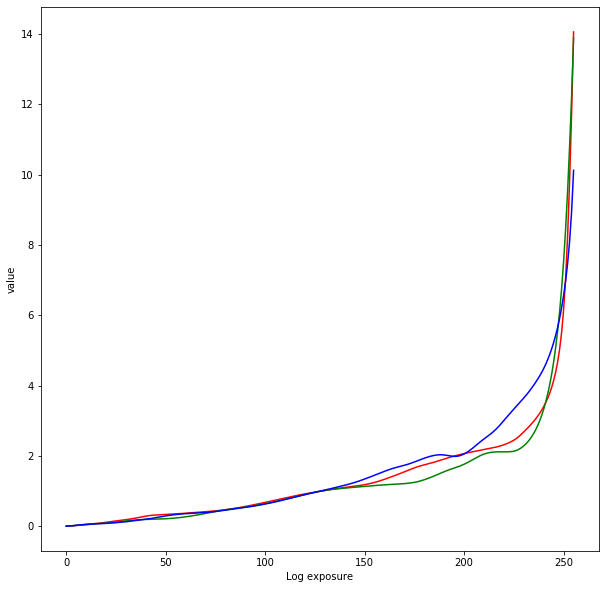

In [31]:
import matplotlib.pyplot as plt
x = range(256)
plt.figure(figsize=(10,10))
plt.plot(x,resDebevec_our_np.T[0][0],color="red")
plt.plot(x,resDebevec_our_np.T[1][0],color="green")
plt.plot(x,resDebevec_our_np.T[2][0],color="Blue")
plt.xlabel("Log exposure")
plt.ylabel("value")
plt.show()

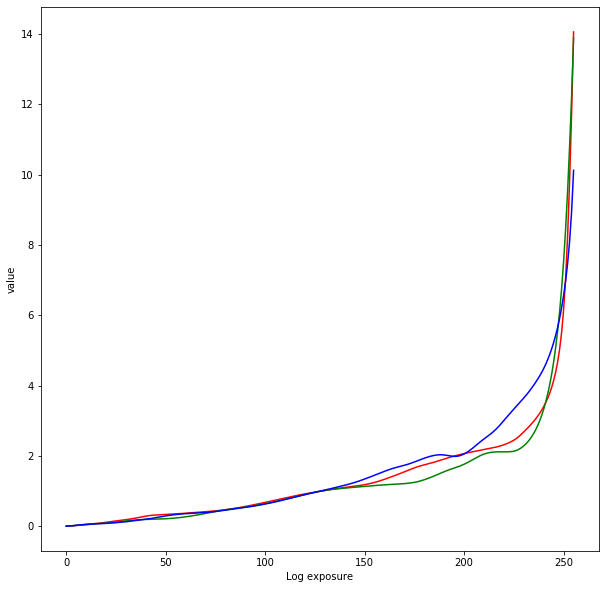

In [28]:
import matplotlib.pyplot as plt
x = range(256)
plt.figure(figsize=(10,10))
plt.plot(x,resDebevec.T[0][0],color="red")
plt.plot(x,resDebevec.T[1][0],color="green")
plt.plot(x,resDebevec.T[2][0],color="Blue")
plt.xlabel("Log exposure")
plt.ylabel("value")
plt.show()

In [33]:
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, resDebevec)
cv2.imwrite("hdrDebevec.jpg", hdrDebevec)

True

In [36]:
tonemapGamma = cv2.createTonemap(3)
ldrGamma = tonemapGamma.process(hdrDebevec)
ldrGamma = 3 * ldrGamma
cv2.imwrite("ldrGamma.jpg", ldrGamma*255)

True